In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
pd.options.display.max_columns=100
pd.options.display.max_rows=15

Populating the interactive namespace from numpy and matplotlib


In [2]:
#importing Dataset

os.chdir("D:\\analytixlabs\\Complete_datasets")
print os.getcwd() 
Telecom=pd.read_csv("Proactive Attrition Management-Logistic Regression Case Study.csv")


D:\analytixlabs\Complete_datasets


In [3]:
Val_Telecom=Telecom.loc[Telecom.CHURNDEP.isnull()]
TT_Telecom=Telecom.loc[Telecom.CHURNDEP.isin([0,1])]
print Val_Telecom.shape
print TT_Telecom.shape

def missing(x):
    return sum(x.isnull())

print "Missing values per column:"
TT_Telecom.loc[ : ,TT_Telecom.apply(missing, axis=0)!=0]

(31047, 78)
(40000, 78)
Missing values per column:


,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,CSA,AGE1,AGE2
31047,38.00,7.50,38.00,0.00,0.00,0.00,-1.50,0.00,MILMIL414,26.0,26.0
31048,55.23,570.50,71.98,0.00,0.00,0.00,38.50,0.00,NNYSYR315,56.0,0.0
31049,38.05,682.50,52.49,0.25,0.00,0.00,147.50,-3.06,OKCTUL918,28.0,0.0
31050,97.34,1039.00,50.00,4.95,419.50,0.00,198.00,23.26,MILMIL414,38.0,24.0
31051,35.30,24.25,34.98,0.00,0.00,0.00,19.75,-0.31,SANMCA210,36.0,34.0
31052,81.00,1056.25,75.00,0.00,0.00,0.00,42.75,2.35,PITHOM412,46.0,68.0
31053,63.02,440.25,59.98,0.00,5.75,1.31,-16.25,0.21,SLCSLC801,99.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
71040,33.63,28.00,29.99,0.00,0.00,0.00,0.00,0.00,NEVENC760,0.0,0.0
71041,85.15,815.00,87.99,0.00,1.00,0.39,0.00,0.00,LAXVNY818,64.0,64.0


In [57]:
TT_Telecom.pivot_table(index=['CHURNDEP','MCYCLE'],values='CUSTOMER',aggfunc='count')

CHURNDEP  MCYCLE
0.0       0         19736
          1           264
1.0       0         19706
          1           294
Name: CUSTOMER, dtype: int64

In [ ]:
#checking some columns how the missing values look
TT_Telecom.apply(missing, axis=0).sort_values(ascending=False)

In [4]:
#removing these 2 columns will give us the base model with any NAs['CALIBRAT' ,'CALLFWDV' ,'CALLWAIT',]

TT_Telecom.drop(labels=['CHURN','CALIBRAT' ,'CALLFWDV' ,'CALLWAIT','CUSTOMER','MAILORD','RETCALL','MODELS','MOUREC','BLCKVCE'],inplace=True,axis=1)
TT_Telecom.dropna(subset=['AGE1','CHANGEM'],inplace=True)

#CSA cant be identified so we we will keep them as missing
TT_Telecom.CSA.fillna('Missing',inplace=True)

C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda2\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
X=TT_Telecom.ix[:,:-1]
y=TT_Telecom.CHURNDEP
#X_test=Val_Telecom.ix[:,:-1]
#y_test=Val_Telecom.CHURNDEP

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(31152, 72)
(7789, 72)
(31152L,)
(7789L,)


In [1]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
lbl_enc.fit(X_train['CSA'])
X_train.CSA=lbl_enc.transform(X_train['CSA'])

lbl_enc.fit(X_test['CSA'])
X_test.CSA=lbl_enc.transform(X_test['CSA'])

NameError: name 'X_train' is not defined

# Method 1


In [ ]:
#applying RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier


logclf=LogisticRegression()
ETclf=ExtraTreesClassifier()
adbclf=AdaBoostClassifier()
bagclf=BaggingClassifier()

In [ ]:
#def features_make80percent(classifier=logclf,)

rfe = RFE(logclf, 15)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
feature_list=sorted([tup for tup in zip(rfe.ranking_,X_train)])

top_features=[col for (rank,col) in feature_list[0:15]]
top_features

In [ ]:
fin_X_train=X_train[features[4]]
fin_X_train.shape
fin_X_test=X_test[features[4]]
print fin_X_train.shape
print X_train.shape
print X_test.shape
print fin_X_test.shape

In [ ]:
from sklearn.grid_search import GridSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}

gs = GridSearchCV(gb, params, cv=10, scoring='roc_auc', n_jobs=4)
gs.fit(fin_X_train, y_train)


y_true, y_pred = y_test, gs.predict(fin_X_test)

In [ ]:
#Metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_true, y_pred))
print '*'*100
print "confusion matrix"
print '-'*100
print confusion_matrix(y_true, y_pred)
print '*'*100
print "acccuracy Score"
print accuracy_score(y_true, y_pred)


In [ ]:
#dont Run
features=[]
for max_features in range(20,30,2):
    rfe = RFE(logclf, max_features)
    rfe = rfe.fit(X_train, y_train)
    feature_list=sorted([tup for tup in zip(rfe.ranking_,X_train)])
    top_features=[col for (rank,col) in feature_list[0:max_features]]
    features.append(top_features)

In [ ]:
#X_train[features[5]]
from sklearn.svm import SVC
svm=SVC(C=0.1,gamma='auto',kernel='linear')
gs = GridSearchCV(svm, params, cv=5, scoring='roc_auc')
gs.fit(fin_X_train, y_train)

y_true, y_pred = y_test, gs.predict(fin_X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_true, y_pred))
print '*'*100
print "confusion matrix"
print '-'*100
print confusion_matrix(y_true, y_pred)
print '*'*100
print "acccuracy Score"
print accuracy_score(y_true, y_pred)

---

# METHOD 2
## Feature selection
- http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

- Stabilty method 
---

In [70]:
from sklearn.linear_model import RandomizedLasso
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X_train, y_train)
names=X_train.columns.tolist()
 
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)

Features sorted by their score:
[(0.0, 'WEBCAP'), (0.0, 'UNIQSUBS'), (0.0, 'UNANSVCE'), (0.0, 'TRUCK'), (0.0, 'TRAVEL'), (0.0, 'THREEWAY'), (0.0, 'SETPRCM'), (0.0, 'SETPRC'), (0.0, 'RV'), (0.0, 'ROAM'), (0.0, 'REVENUE'), (0.0, 'RETCALLS'), (0.0, 'RETCALL'), (0.0, 'RETACCPT'), (0.0, 'REFURB'), (0.0, 'REFER'), (0.0, 'RECCHRGE'), (0.0, 'PRIZMUB'), (0.0, 'PRIZMTWN'), (0.0, 'PRIZMRUR'), (0.0, 'PHONES'), (0.0, 'PEAKVCE'), (0.0, 'PCOWN'), (0.0, 'OWNRENT'), (0.0, 'OVERAGE'), (0.0, 'OUTCALLS'), (0.0, 'OPEAKVCE'), (0.0, 'OCCSTUD'), (0.0, 'OCCSELF'), (0.0, 'OCCRET'), (0.0, 'OCCPROF'), (0.0, 'OCCHMKR'), (0.0, 'OCCCRFT'), (0.0, 'OCCCLER'), (0.0, 'NEWCELLY'), (0.0, 'NEWCELLN'), (0.0, 'MOUREC'), (0.0, 'MOU'), (0.0, 'MONTHS'), (0.0, 'MODELS'), (0.0, 'MCYCLE'), (0.0, 'MARRYYES'), (0.0, 'MARRYUN'), (0.0, 'MARRYNO'), (0.0, 'MAILRES'), (0.0, 'MAILORD'), (0.0, 'MAILFLAG'), (0.0, 'INCOME'), (0.0, 'INCMISS'), (0.0, 'INCALLS'), (0.0, 'EQPDAYS'), (0.0, 'DROPVCE'), (0.0, 'DROPBLK'), (0.0, 'DIRECTAS'), (0.0, 'CU

In [77]:
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
sorted(zip(lr.coef_, 
                 names), reverse=True)
#sorted(zip(lr.rank_,names),reverse=True)
lr.rank_

72

In [80]:
print '*'*50 + 'SCORES'+ '*'*50

**************************************************SCORES**************************************************


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

params={'n_estimators': [100,120,300],
        'max_depth': [5,8]}
rf = RandomForestRegressor()


gs = GridSearchCV(rf,params, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)



**************************************************SCORES**************************************************
Features sorted by their score:


NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [85]:
print gs.best_estimator_
print gs.best_params_
print gs.best_score_
print gs.cv

print gs.error_score
print gs.grid_scores_
print gs.scoring
print gs.scorer_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
{'n_estimators': 300, 'max_depth': 8}
0.660706452466
5
raise
[mean: 0.64682, std: 0.00870, params: {'n_estimators': 100, 'max_depth': 5}, mean: 0.64681, std: 0.00924, params: {'n_estimators': 120, 'max_depth': 5}, mean: 0.64766, std: 0.00887, params: {'n_estimators': 300, 'max_depth': 5}, mean: 0.65951, std: 0.00896, params: {'n_estimators': 100, 'max_depth': 8}, mean: 0.65967, std: 0.00806, params: {'n_estimators': 120, 'max_depth': 8}, mean: 0.66071, std: 0.00835, params: {'n_estimators': 300, 'max_depth': 8}]
roc_auc
make_scorer(roc_auc_score, needs_threshold=True)


In [ ]:
y_true, y_pred = y_test, gs.predict(X_test)


print gs.best_params_
print gs.best_score_
print gs.score


print '*'*50 + 'METRICS'+ '*'*50
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print '*'*50 + 'classification_report'+ '*'*50
print(classification_report(y_true, y_pred))
print '*'*100
print '*'*50 + 'confusion_matrix'+ '*'*50
print '-'*100
print confusion_matrix(y_true, y_pred)
print '*'*100
print '*'*50 + 'acccuracy Score'+ '*'*50
print accuracy_score(y_true, y_pred)


## Applying PCA

[ 13.13  22.1   26.62  30.02  33.1   35.9   38.36  40.65  42.79  44.89
  46.74  48.53  50.27  51.96  53.6   55.19  56.76  58.32  59.79  61.25
  62.7   64.13  65.56  66.98  68.38  69.76  71.12  72.47  73.81  75.13
  76.43  77.69  78.94  80.16  81.33  82.47  83.53  84.58  85.59  86.58]


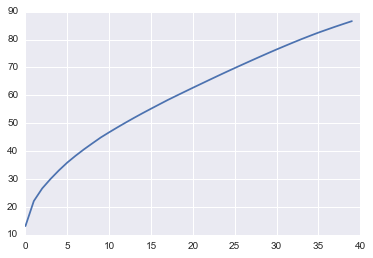

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#Scaling the values
X = scale(X_train)


pca = PCA(n_components=40)
pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print var1

plt.plot(var1)



In [ ]:
pca.

In [12]:
#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=34)
pca.fit(X)
X1=pca.fit_transform(X)

print X1

[[-2.60401903 -2.11001815  1.82121627 ..., -0.38061669 -0.48025709
  -0.4497662 ]
 [ 3.29969831 -3.22707177  3.18248643 ..., -1.58531829  3.49152458
  -0.7725086 ]
 [-0.8675456  -2.95158199 -1.29966741 ...,  1.84081625  2.33058855
   0.81104952]
 ..., 
 [ 2.21664014  4.01854979 -1.08888997 ...,  1.62718152 -0.39098247
   1.94740606]
 [-0.92469129  4.86054335 -0.68119381 ...,  0.11800843  0.2839804
  -0.44055948]
 [-1.11869802 -2.78703178 -2.35127564 ...,  0.95842868  0.81237627
  -0.03627837]]


In [14]:
X

array([[-0.16337323, -0.38090235, -0.68963341, ...,  0.85816948,
        -0.61725265, -0.2005935 ],
       [ 1.19525815,  2.38543011,  0.43460608, ...,  0.85816948,
        -0.61725265, -0.2005935 ],
       [-0.49141254, -0.32329027, -0.05249353, ..., -1.165271  ,
         2.03971475, -0.2005935 ],
       ..., 
       [-0.18173617, -0.13140869, -0.26501517, ...,  0.85816948,
        -0.61725265,  4.98520633],
       [-0.64647742, -0.89084075, -0.69005846, ...,  0.85816948,
        -0.61725265, -0.2005935 ],
       [-0.16496015, -0.11902923,  0.5850714 , ..., -1.165271  ,
         2.03971475, -0.2005935 ]])